## This is heart disease prediction project
we are going to predict based on data wheater have heart disease or not

- Problem defination
- Data
- Evaluate  
- Features
- Modeling
- Experimantations

# 2- Data
We have data and uploaded it already

# 3- Evaluate
 In initial stage we need to make sure our accuracy is 95%

# 4- Features
what features are imporatant and what features columns what means

age

sex: (0 = Female, 1 = Male)

cp: chest pain type (4 values)[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

trestbps: resting blood pressure

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl

restecg: resting electrocardiographic results (values 0,1,2)

thalach: maximum heart rate achieved

exang: exercise induced angina

oldpeak:  ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: 0 = No disease , 1 = Disease

# Tools Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Models of Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import Evaluation libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

# Exploring Data initial stage
- what proble i am going to solve
- what kind of data i have
- does this data have missing values
- are there any outlier,sporious vector
- can we add or remove some of the features

In [2]:
df_heart = pd.read_csv("heart (4).csv")
df_heart.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df_heart.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
#info about dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df_heart.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

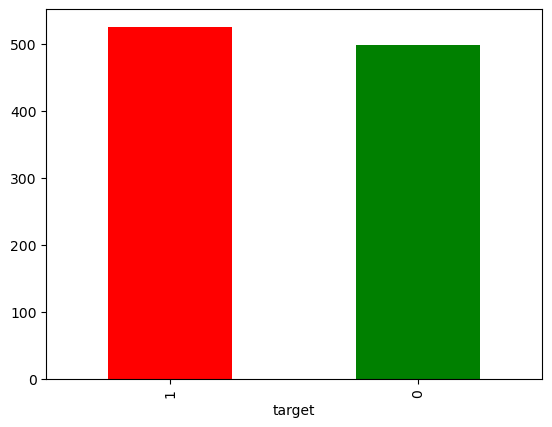

In [6]:
#lets visualize our target column to check how many patient have heart disease

df_heart.target.value_counts().plot(kind = "bar", color =["red",'green'])
plt.show()

In [7]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_heart.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [9]:
len(df_heart)

1025

In [10]:
pd.crosstab(df_heart.target,df_heart.sex)

sex,0,1
target,,
0,86,413
1,226,300


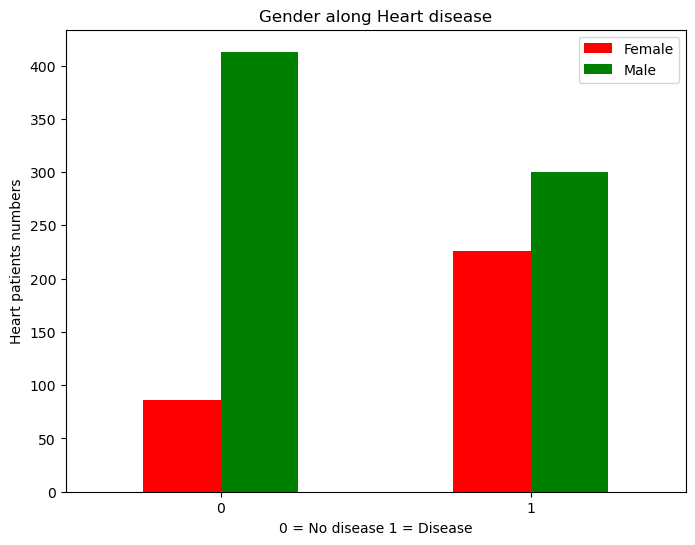

In [11]:
#Lets visualize how many mens and womens involve in disease

pd.crosstab(df_heart.target,df_heart.sex).plot(kind = "bar",figsize =(8,6) ,color = ['red','green'])

plt.xlabel("0 = No disease 1 = Disease")
plt.ylabel("Heart patients numbers")
plt.title("Gender along Heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0)
plt.show()


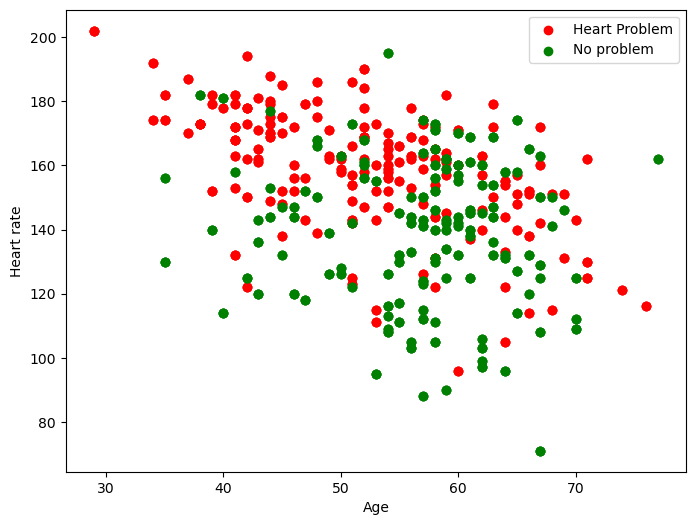

In [12]:
#Finding pattern in data using scatter plot

plt.figure(figsize=(8,6))

plt.scatter(df_heart.age[df_heart.target == 1],df_heart.thalach[df_heart.target == 1], color = 'red')
plt.scatter(df_heart.age[df_heart.target == 0],df_heart.thalach[df_heart.target == 0], color = 'green')

plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.legend(["Heart Problem","No problem"])
plt.show()


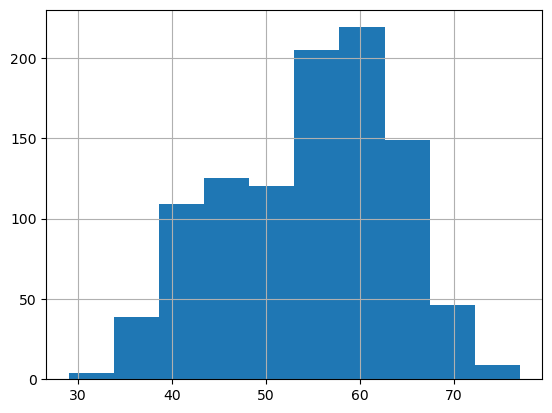

In [13]:
#Create Histogram too see Age distribution
df_heart.age.hist()
plt.show()


In [14]:
#Lets see what type of relation about chest pain and target

pd.crosstab(df_heart.cp,df_heart.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


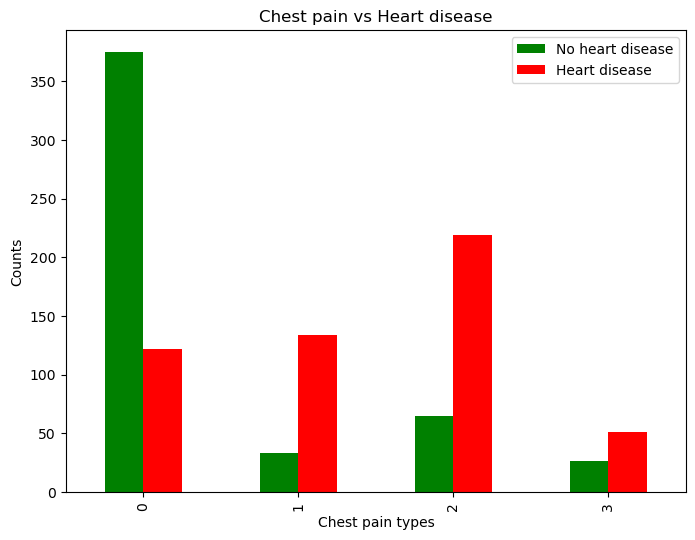

In [15]:
#Make the bar plot of chest pain vs target
pd.crosstab(df_heart.cp,df_heart.target).plot(kind="bar",figsize =(8,6), color =["green","red"])

#Make some description 
plt.title("Chest pain vs Heart disease")
plt.xlabel("Chest pain types")
plt.ylabel("Counts")
plt.legend(["No heart disease","Heart disease"])
plt.show()


In [16]:
# Correlation Matrix
df_heart.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


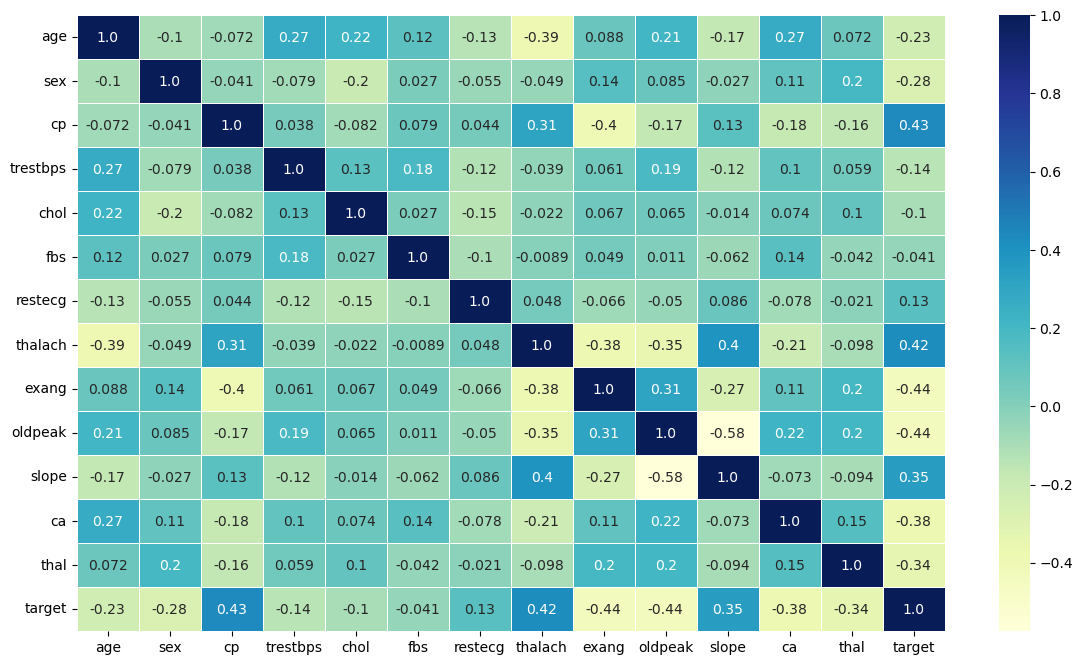

In [17]:
#Lets draw correlation map
cor = df_heart.corr()

fig,ax = plt.subplots(figsize = (14,8))

ax = sns.heatmap(data=cor,
                annot=True,
                linewidths=0.5,
                fmt = '0.2',
                cmap = "YlGnBu")

# Modeling

In [18]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
#Lets split data into test and train

x = df_heart.drop("target", axis = 1)
y = df_heart["target"]


In [20]:
#Using random seed, That other could produced the same result
np.random.seed(7)

#Split into test and train

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 )

In [21]:
#lets verify data distribution
len(x_train),len(x_test)

(820, 205)

# The models we are going to use

- KNeighbourclassifier
- RandomForestClassifier
- LogitcRegression

In [22]:
#Create dictionary and put all models in it

models  = {

    "KNN":KNeighborsClassifier(),
    "clf":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression()
}

In [23]:
#Create Function to evalute the model

def fit_and_evaluate (models,x_train,x_test,y_train,y_test):
    np.random.seed(7)

    model_score = {}

    #Loop for fit and evluate
    for name,model in models.items():
        model.fit(x_train,y_train)

        model_score[name] = model.score(x_test,y_test)

    return model_score

In [24]:
models_result = fit_and_evaluate(models=models,
                                x_train=x_train,
                                x_test=x_test,
                                y_train=y_train,
                                y_test=y_test)

C:\Users\LENOVO\Desktop\Cardiology_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
models_result

{'KNN': 0.7463414634146341,
 'clf': 1.0,
 'Logistic Regression': 0.8780487804878049}

In [26]:
#Lets visualize models results

df_comparison = pd.DataFrame(models_result, index=["Accracy"])
df_comparison

,KNN,clf,Logistic Regression
Accracy,0.746341,1.0,0.878049


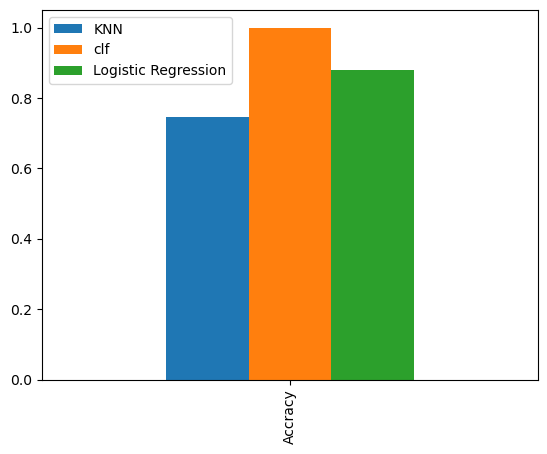

In [27]:
#Plot the comparison results of models

df_comparison.plot(kind = "bar");

# Imroving And Tunning model

- Hyperparameters Tunning
- Futures improving
* Confusion Matrix
* CrossValidation
* Precission
* Recall
* Accuracy
* F1
* Roc-Curve




In [28]:
#Lets improve KNN model

train_score = []
test_score =  []

#KNN instance
KNN = KNeighborsClassifier()

#Create range to be test for n_neihbours
neighbours = range(1,30)

#Looping through the range

for i in neighbours:
    KNN.set_params(n_neighbors = i)
    #Run the fit for its values
    KNN.fit(x_train,y_train)

    #Update the training score
    train_score.append(KNN.score(x_train,y_train))

   #update test score
    test_score.append(KNN.score(x_test,y_test))
    

In [29]:
#Check train score

train_score

[1.0,
 0.9951219512195122,
 0.9902439024390244,
 0.9451219512195121,
 0.9182926829268293,
 0.8219512195121951,
 0.7951219512195122,
 0.7914634146341464,
 0.75,
 0.775609756097561,
 0.774390243902439,
 0.7560975609756098,
 0.7536585365853659,
 0.7353658536585366,
 0.751219512195122,
 0.7658536585365854,
 0.7621951219512195,
 0.7463414634146341,
 0.7329268292682927,
 0.7329268292682927,
 0.7292682926829268,
 0.7341463414634146,
 0.7414634146341463,
 0.7378048780487805,
 0.7463414634146341,
 0.7341463414634146,
 0.7414634146341463,
 0.7402439024390244,
 0.7451219512195122]

In [30]:
#Check test score

test_score

[0.9804878048780488,
 0.9414634146341463,
 0.9024390243902439,
 0.8,
 0.7463414634146341,
 0.7219512195121951,
 0.7317073170731707,
 0.7268292682926829,
 0.7414634146341463,
 0.7463414634146341,
 0.7121951219512195,
 0.7170731707317073,
 0.7170731707317073,
 0.7121951219512195,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7024390243902439,
 0.6829268292682927,
 0.6780487804878049,
 0.6731707317073171,
 0.6829268292682927,
 0.7268292682926829,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585,
 0.7365853658536585]

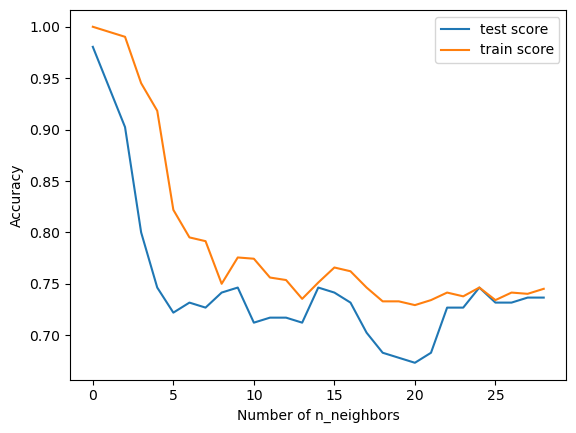

Maximum accuracy of KNN test score is: 98.048780%


In [31]:
#Lets plot test score

plt.plot(test_score, label ='test score')
plt.plot(train_score, label ='train score')
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f"Maximum accuracy of KNN test score is: {max(test_score)*100:2f}%")

In [32]:
#Now improve our Logistic Regression model

#Create parameters in dictionary

LR_hp = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}


# Hyperparamter tunning of Logistic Regression Using RandomSearchCV

In [33]:
#Lets use RSCV to tune model

lrsc = RandomizedSearchCV(LogisticRegression(),
                         param_distributions=LR_hp,
                         n_iter=10,
                         cv = 5,
                         verbose=True)

In [34]:
#Fit the lrsv model

lrsc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
#Check lrcv score

lrsc.score(x_test,y_test)

0.8682926829268293

# Running the model with Hyperparameters using GridSearchcv

In [36]:
gslr = GridSearchCV(LogisticRegression(),
                    param_grid=LR_hp,
                    cv = 5,
                    verbose=True)

In [37]:
#Fit model using Grid

gslr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
#Chech score

gslr.score(x_test,y_test)

0.8682926829268293

# Running the model with Hyperparameters using GridSearchcv

In [39]:
#Create dictionary and put some parameters of RandomForest

RFC_hp = {
    "n_estimators":[100,200],
    "max_depth":[None,10],
    "min_samples_leaf":[1,2],
    "min_samples_split":[2,4]
}

#Using Grid 

clf_gr = GridSearchCV(RandomForestClassifier(),
                    param_grid=RFC_hp,
                    cv = 5,
                    verbose=True)

In [40]:
#Fit the model

clf_gr.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             verbose=True)

In [41]:
#check score 

clf_gr.score(x_test,y_test)

1.0

In [42]:
#create prediction of x_test

y_pred = clf_gr.predict(x_test)

In [43]:
#Best parameters

best_paramters = clf_gr.best_params_

In [44]:
#Create dataframe of paramters

best_parameters_df = pd.DataFrame(best_paramters,index=["Best Parameter"])

In [45]:
best_parameters_df

,max_depth,min_samples_leaf,min_samples_split,n_estimators
Best Parameter,10,1,2,200


# Comparison of score

* 'KNN': 0.74 &&  After improving score : 98.04
* 'clf': 1.0 , Already Maximum && After using Grid score also : 1.0
* 'Logistic Regression': 0.87 && After improving score: 0.86



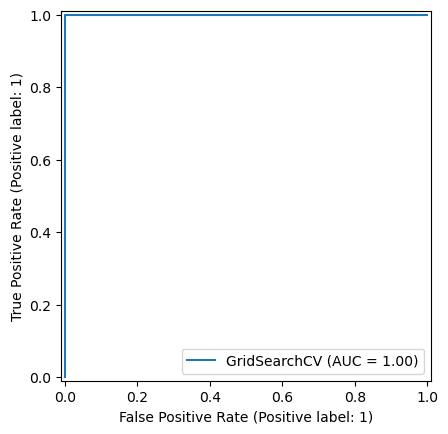

In [46]:
#Plot roc curve

RocCurveDisplay.from_estimator(clf_gr,x_test,y_test)

In [47]:
#Confusion Matrix

confusion_matrix(y_test,y_pred)

array([[ 89,   0],
       [  0, 116]], dtype=int64)

In [48]:
#Plot the matrix 

#create instant of conf
conf = confusion_matrix(y_test,y_pred)

#Create function of confusion matrix
def confusion_matrix(y_test,y_pred):
    fig,plot = plt.subplots(figsize = (4,4))
    plot=sns.heatmap(conf,
                    annot=True,
                    cbar=False)
  

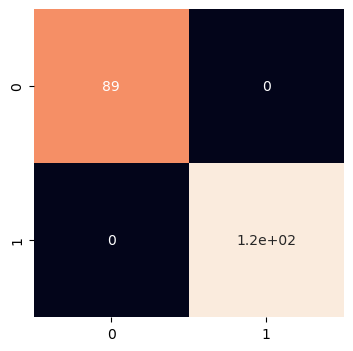

In [49]:
confusion_matrix(y_test,y_pred)

# Lets plot classsification report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       116

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [52]:
#Cross Validation accuracy

cv_accuracy =cross_val_score(clf_gr,x,y, cv = 5, scoring ="accuracy" )
mean_acc = np.mean(cv_accuracy)
mean_acc


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.9941463414634146

In [54]:
#Cross Validation precision

cv_precision =cross_val_score(clf_gr,x,y, cv = 5, scoring ="precision" )
mean_pre = np.mean(cv_precision)
mean_pre


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.9944954128440366

In [55]:
#Cross Validation recall

cv_recall =cross_val_score(clf_gr,x,y, cv = 5, scoring ="recall" )
mean_recall = np.mean(cv_recall)
mean_recall


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


1.0

In [56]:
#Cross Validation f1

cv_f1 =cross_val_score(clf_gr,x,y, cv = 5, scoring ="f1" )
mean_f1 = np.mean(cv_f1)
mean_f1


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.9943924009171307

In [58]:
# Visualize cross validation metrix

df_cv = pd.DataFrame({"Accuracy":mean_acc,"Precision":mean_pre,"Recall":mean_recall,"F1":mean_f1}, index = [0])
df_cv

,Accuracy,Precision,Recall,F1
0,0.994146,0.994495,1.0,0.994392


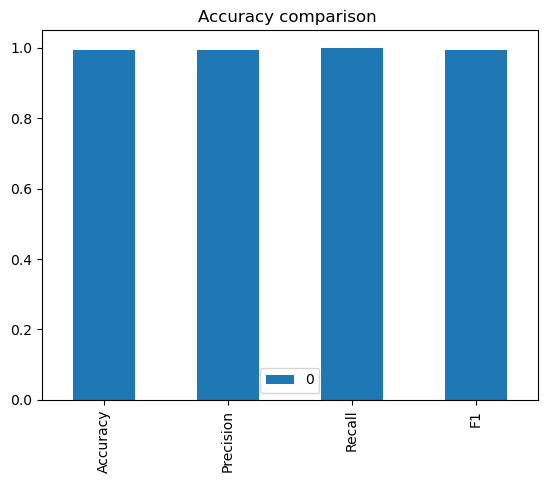

In [62]:
#Plot cross Validation matrix accuracy

df_cv.T.plot.bar()
plt.title("Accuracy comparison ")
plt.show()

# Feature improving



In [64]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
#Check coefficient
clf_gr.fit(x_train,y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             verbose=True)

In [73]:
clf_gr.best_estimator_.feature_importances_

array([0.09220069, 0.03894433, 0.13723557, 0.06995071, 0.08034494,
       0.01056323, 0.01885538, 0.10842564, 0.05159063, 0.11429688,
       0.0534627 , 0.11412833, 0.11000097])

In [75]:
final_coef = dict(zip(df_heart.columns,list( clf_gr.best_estimator_.feature_importances_)))
final_coef

{'age': 0.09220069043424715,
 'sex': 0.03894433136896316,
 'cp': 0.13723557447487433,
 'trestbps': 0.06995070736752591,
 'chol': 0.08034493979367861,
 'fbs': 0.010563231225691975,
 'restecg': 0.018855380566341475,
 'thalach': 0.1084256422505055,
 'exang': 0.05159062868665728,
 'oldpeak': 0.11429688280195686,
 'slope': 0.053462699155582036,
 'ca': 0.11412832526267436,
 'thal': 0.11000096661130132}

In [77]:
# Create dataframe and put data into

df_coef = pd.DataFrame(final_coef,index=[0])
df_coef

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.092201,0.038944,0.137236,0.069951,0.080345,0.010563,0.018855,0.108426,0.051591,0.114297,0.053463,0.114128,0.110001


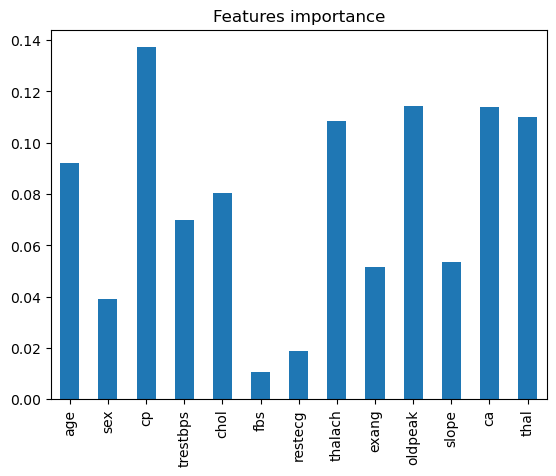

In [83]:
#Plot the dataframe of coefficient

df_coef.T.plot.bar(title = 'Features importance', legend = False)
plt.show()

# Conclusion
* i set 95% accuracy and we choose 3 models for our dataset according to sklearn estimator map.
* i choose KNeighbours, Random Forset Classifier and Logistic Regression for our dataset.
* when i initially evalute our models we get accuracy =[KNN': 0.7463414634146341,'cl': 1.0 'Logistic Regressin': 0.878048780487809.
* then i try to improve our model on manually and RandomSearchCV and GridSearchCV and i improve our KNN model and get 98% accuracy and clf also remain on top at 100% accuracy but our logistic regression not improve.
* i prefer  Random Forset Classifier estimator due to maximum accuracy and i done more works on it.
* According to my Aim am successfully best accuracy on KNN and Random Forest classifier. 
  }]